<a href="https://colab.research.google.com/github/danio2010/ON2022/blob/main/LAB7%2B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wykresy i wizualizacja danych w Pythonie

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


Tryby wyświetlania:
* **inline**
* notebook 
* qt
* i inne

Tryby interfejsu:
* **obiektowy**
* Matlabowy (pyplot)



In [ ]:
%matplotlib inline

Dwie ważne klasy: ```Figure``` (kanwa obrazka) i ```Axes``` (umieszczony na kanwie układ odniesienia wykresu). Rysowanie różnych wykresów to metody klasy ```Axes```

In [ ]:
fig=plt.figure(figsize=(10,6),facecolor='green')


<Figure size 720x432 with 0 Axes>

Dodajemy fragment z układem odniesienia do obrazka fig. Podajemy wpółrzędne (lewy,dół,szerokość,wysokość) w proporcjach do całego fig

In [ ]:
ax1=fig.add_axes((0.1,0.2,0.8,0.8))

Dane do rysowania podajemy w postaci tablicy ```np.ndarray``` lub czegoś, co może być na tablicę przekonwertowane (```np.asarray```)

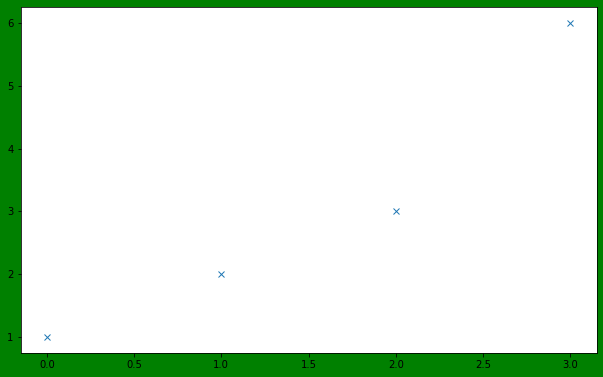

In [ ]:
ax1.clear()
ax1.plot([1,2,3,6],'x')
fig

Sporządzanie kolejnych wykresów dodaje je do wspólnego rysunku. Możemy wyczyścić zarówno ```figure``` jak i ```axes``` (np. ```ax1.clear()```).

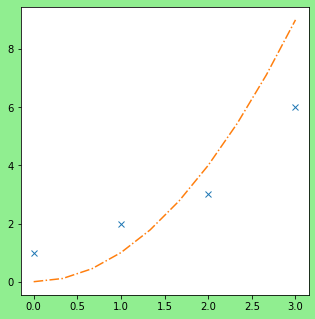

In [ ]:
x=np.linspace(0,3,10)
y=x**2
ax1.plot(x,y,linestyle='-.')
fig

In [ ]:
fig.clear()
fig

<Figure size 360x360 with 0 Axes>

Obrazek (figure) i umieszczoną w nim siatkę układów odniesienia (axes) można wygenerować jednym poleceniem

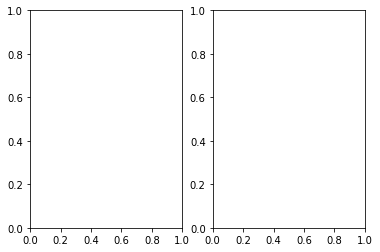

In [ ]:
fig2, axes2 = plt.subplots(1,2)
?plt.subplots

Wykresy można ubogacać o osie, tytuły, legendę itd. (co tylko się zapragnie).

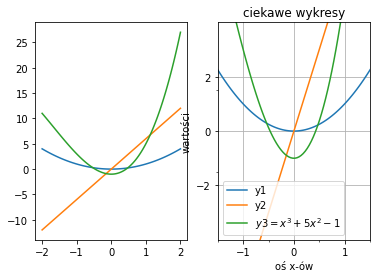

In [ ]:
ax21.clear()
ax22.clear()

x=np.linspace(-2,2,100)
y1=x**2
y2=6*x
y3=x**3+5*x**2-1
ax21.plot(x,y1)
ax21.plot(x,y2)
ax21.plot(x,y3)
#------------------------teraz wersja ulepszona
ax22.plot(x,y1,label='y1')
ax22.plot(x,y2,label='y2')
ax22.plot(x,y3,label='$y3=x^3+5x^2-1$')
ax22.legend()

#Dodawanie opisów osi i rysunku (na dwa sposoby)
#ax22.set_xlabel('oś x-ów')
#ax22.set_ylabel('wartości')
#ax22.set_title('ciekawe wykresy')
ax22.set(xlabel='oś x-ów', ylabel='wartości', title='ciekawe wykresy')

#Określanie limitów osi
ax22.axis([-1.5,1.5,-4,4]) #albo ax22.set_xlim(-1.5,1.5)

#Określanie podziałek na osiach i dodanie kraty
ax22.set_xticks([-1,0,1])
ax22.set_yticks([0,2,-2])
ax22.set_yticks([0,1.5,-1.5], minor=True)
ax22.xaxis.set_minor_locator(mpl.ticker.MaxNLocator(6)) #automatyczne utworzenie drobniejszych podziałek które domyślnie nie generują gridu
ax22.grid()
fig2

### Najważniejsze typy wykresów dla danych 1D:

* liniowy ```ax.plot```
* punktowy ```ax.scatter``` (każdy punkt ma indywidualne własności)
* słupkowy ```ax.bar```
* histogram ```ax.hist``` [porównanie](https://medium.com/@georginasampson4/matplotlibs-bargraph-vs-histogram-960e9125a0a5)

#### Wykresy liniowe

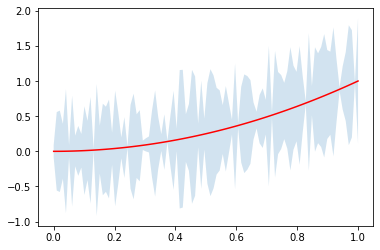

In [ ]:
fig,ax=plt.subplots()
error=np.random.random(100)
x=np.linspace(0,1,100)
y=x**2
ax.plot(x,y,color='red')
ax.fill_between(x,y-error,y+error,alpha=0.2)

#### Punktowe

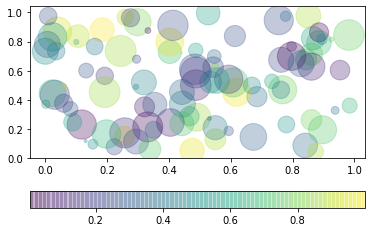

In [ ]:
fig3,ax3=plt.subplots()
x = np.random.random(100)
y = np.random.random(100)
colors = np.random.random(100)
sizes = 1000 * np.random.random(100)

image=ax3.scatter(x, y, c=colors, s=sizes, alpha=0.3)
fig3.colorbar(image,orientation = 'horizontal')

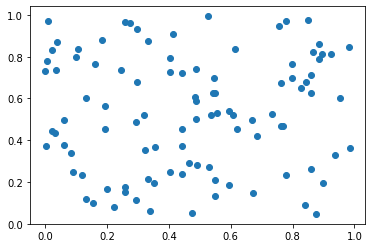

In [ ]:
fig,ax=plt.subplots()
ax.plot(x,y,'o')

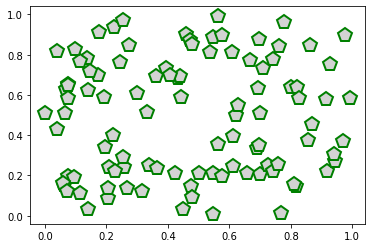

In [ ]:
fig,ax=plt.subplots()
ax.plot(x, y, 'p',
         markersize=15, linewidth=4,
         markerfacecolor='lightgray',
         markeredgecolor='green',
         markeredgewidth=2)


In [ ]:
?ax.plot

#### Zadanie
Narysuj wykres funkcji $x^3-4x^2+3x-4$ na odcinku $[-1,4]$ niebieską przerywaną linią. Znajdź (wykorzystując poznane dotychczas metody) lokalne maksima i minima tej funkcjina $(-1,4)$ i zaznacz je na rysunku - maksima jako zielone kółka, a minima jako czerwone krzyżyki.

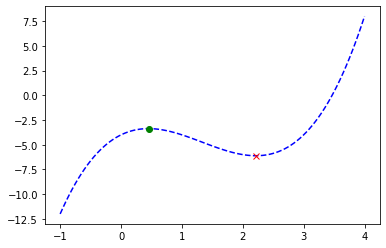

In [ ]:
import sympy as sp
x=sp.symbols('x')
f=x**3-4*x**2+3*x-4
D2f=f.diff(x,2)
extrema=sp.solve(f.diff(x))

fig,ax=plt.subplots()
inter=np.linspace(-1,4,100)
g=sp.lambdify(x,f)
ax.plot(inter,g(inter),color='blue',linestyle='--')
for el in extrema:
    if (el>-1 and el<4 and D2f.subs(x,el)>0):
        ax.plot(el,g(el),color='red',marker='x')
    if (el>-1 and el<4 and D2f.subs(x,el)<0):
        ax.plot(el,g(el),color='green',marker='o') 

        

#### Słupkowe/histogramy

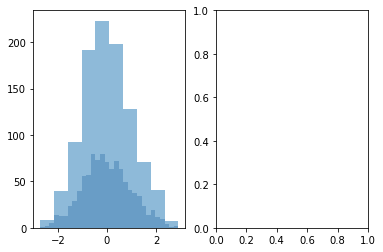

In [ ]:
data = np.random.randn(1000) #próbka z rozkładu normalnego
data2=np.random.random(1000)
fig,ax=plt.subplots(1,2)
ax[0].hist(data,alpha=0.5)
ax[0].hist(data, bins=30, alpha=0.5,
         color='steelblue',
         edgecolor='none');

<BarContainer object of 4 artists>

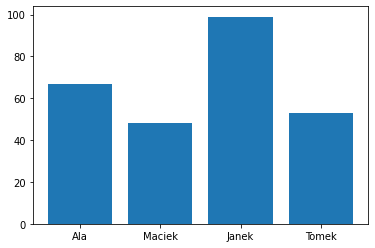

In [ ]:
fig,ax=plt.subplots()
uczniowie=['Ala','Maciek','Janek','Tomek']
wyniki=[67,48,99,53]
ax.bar(uczniowie,wyniki)

### Wykresy 2D danych wielowymiarowych 
* ```plt.quiver``` - strzałki, pole wektorowe $f:R^2\to R^2$
* ```plt.contour``` - wykres konturowy, poziomice funkcji $f:R^2\to R$
* ```plt.contourf``` - z wypełnieniem
* ```plt.imshow``` - wykres jako obrazek



(-2.0, 2.0, -2.0, 2.0)

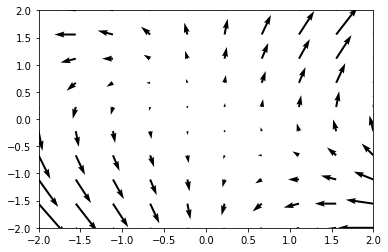

In [ ]:
#quiver
x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(x, y)
fig,ax=plt.subplots()
ax.quiver(X,Y,X*Y,X+Y)
ax.axis([-2,2,-2,2])

#### Zadanie 
Narysuj wykres pola wektorowego $F(x,y)=(1-x^2+y,1+x+y^2)$ na obszarze $K=[-3,3]\times[-3,3]$.

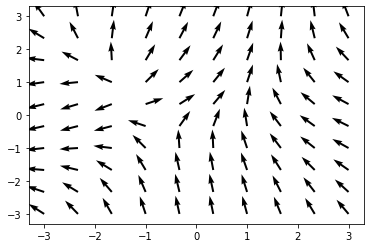

In [ ]:
#rozwiązanie
X,Y=np.meshgrid(np.linspace(-3,3,10),np.linspace(-3,3,10))
fig,ax=plt.subplots()
WX=1-X**2+Y
WY=1+X+Y**2
WXN=WX/(np.sqrt(WX**2+WY**2))
WYN=WY/(np.sqrt(WX**2+WY**2))
ax.quiver(X,Y,WXN,WYN)




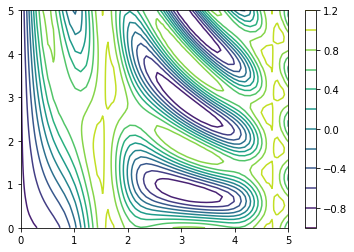

In [ ]:
#contour
def f(x,y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
x = np.linspace(0, 5, 50)
y = np.linspace(0,5, 50)
X, Y = np.meshgrid(x, y)
fig,ax=plt.subplots()
im=ax.contour(X,Y,f(X,Y),10)
fig.colorbar(im)

#### Obrazki

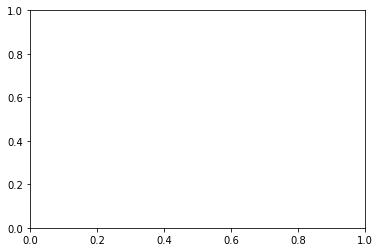

In [ ]:
fig,ax=plt.subplots()

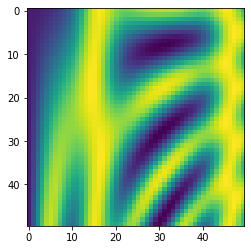

In [ ]:
plt.imshow(f(X,Y))

#### Zadanie
Narysuj czarno-białą szachownicę 8x8 z czarnym polem w lewym dolnym rogu. Usuń oznaczenia osi. Umieść krzyżyki na białej przekątnej.

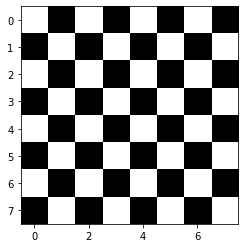

In [ ]:
ChB=np.fromfunction(lambda i,j:i+j+1,(8,8)) %2
fig,ax=plt.subplots()
ax.imshow(ChB,cmap='gray')
ax.set_xticks([])
ax.set_yticks([])
ax.plot(np.arange(8),np.arange(8),'x')


<class 'numpy.ndarray'>
(524, 800, 3)


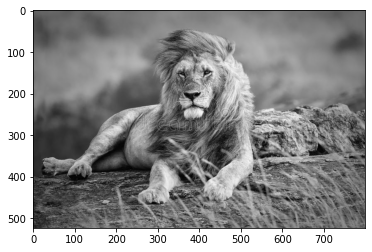

In [2]:
from skimage.io import imread, imsave #wczytywanie i zapisywanie obrazków
im=imread('https://thumbs.dreamstime.com/b/mighty-beautiful-lion-resting-african-savannah-black-white-kenya-96042281.jpg')
print(type(im))
print(im.shape)
plt.imshow(im)

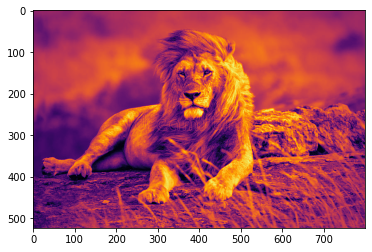

In [ ]:
plt.imshow(im[:,:,1],cmap='inferno')

In [5]:
im2=0.299*im[:,:,0]+0.587*im[:,:,1]+0.114*im[:,:,2]

In [ ]:
U,Sigma,V=np.linalg.svd(im2)
print('Bajty trzech macierzy przed kompresją: ',U.nbytes+Sigma.nbytes+V.nbytes)
print('Bajty obrazka przed kompresją: ',im2.nbytes)

Bajty trzech macierzy przed kompresją:  7320800
Bajty obrazka przed kompresją:  3353600


In [ ]:
k=50
Sigma1=Sigma[:k]
U1=U[:,:k]
V1=V[:k,:]

imNew=np.dot(U1,np.dot(np.diag(Sigma1),V1))
print('Bajty trzech macierzy po kompresji: ',U1.nbytes+V1.nbytes+Sigma1.nbytes)

Bajty trzech macierzy po kompresji:  530000


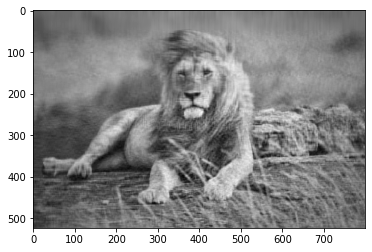

In [ ]:
plt.imshow(imNew,cmap='gray')

In [9]:
im3=im2[:,:524]
wartosci,P=np.linalg.eig(im3)

In [13]:
(P @ np.diag(wartosci) @ np.linalg.inv(P) - im3).round(2)

array([[ 0.+0.j, -0.+0.j, -0.+0.j, ..., -0.-0.j,  0.+0.j, -0.+0.j],
       [ 0.+0.j, -0.+0.j, -0.+0.j, ..., -0.-0.j,  0.+0.j, -0.+0.j],
       [ 0.+0.j, -0.+0.j, -0.+0.j, ..., -0.-0.j,  0.+0.j, -0.+0.j],
       ...,
       [ 0.+0.j, -0.+0.j, -0.+0.j, ..., -0.-0.j,  0.+0.j, -0.+0.j],
       [ 0.+0.j, -0.+0.j, -0.+0.j, ..., -0.-0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, -0.+0.j, -0.+0.j, ..., -0.-0.j,  0.+0.j,  0.+0.j]])

In [26]:
wartosci2=np.hstack([wartosci,np.array([1])])

In [17]:
zera=np.zeros(shape=(1,524))

In [18]:
P2=np.vstack([P,zera])

In [21]:
nowy_wektor=np.ones(shape=(525,1))
P3=np.hstack([P2,nowy_wektor])

In [32]:
im4=(P3 @ np.diag(wartosci2) @ np.linalg.inv(P3)).real

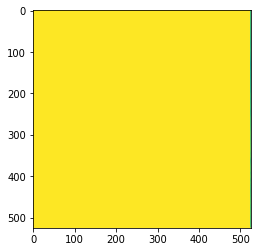

In [33]:
plt.imshow(im4)

#### Zadanie
* Wczytaj dowolny kolorowy obrazek RGB
* Odbij go w poziomie
* Zamień wartościami warstwę czerwoną z zieloną

[Więcej numpy na obrazkach](https://note.nkmk.me/en/python-numpy-image-processing/)


### Wykresy 3d

```python
from mpl_toolkits import mplot3d
fig=plt.figure()
ax1=fig.add_subplot(projection='3d')
```
* ```Axes3D.plot```(x,y,z)
* ```Axes3D.scatter```
* ```Axes3D.bar3D``` (listy <płaskie> współrzędnych)
* ```Axes3D.contour3D``` (siatka punktów, wartości, tzn. 2D,2D,2D)
* ```Axes3D.plot_surface``` (siatka punktów, wartości)


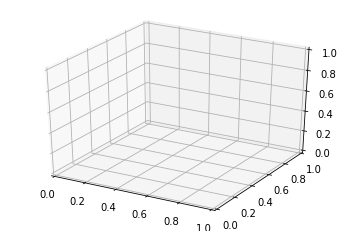

In [34]:
from mpl_toolkits import mplot3d
fig=plt.figure()
ax1=fig.add_subplot(projection='3d')

In [35]:
type(ax1)

matplotlib.axes._subplots.Axes3DSubplot

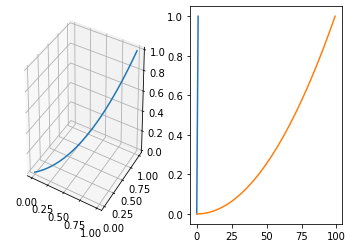

In [36]:
%matplotlib inline
from mpl_toolkits import mplot3d

x=np.linspace(0,1,100)
y=np.linspace(0,1,100)
z=x*y
fig=plt.figure()
ax1=fig.add_subplot(121,projection='3d')
ax1.plot(x,y,z)
ax2=fig.add_subplot(122)
ax2.plot(x,y,z)

In [43]:
np.meshgrid([1,2],[3,4])[1]

array([[3, 3],
       [4, 4]])

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


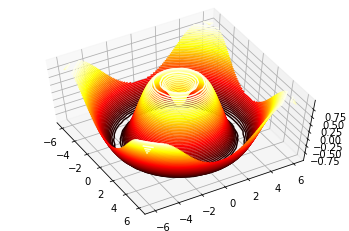

In [40]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='hot')
ax.view_init(elev=60., azim=-30)

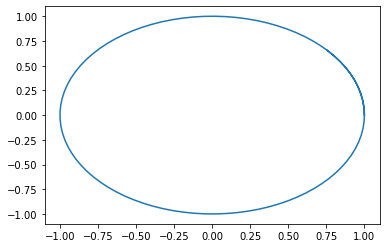

In [44]:
fig,ax=plt.subplots()
theta=np.linspace(0,7,100)
x=np.cos(theta)
y=np.sin(theta)
ax.plot(x,y)

#### Zadanie
Narysuj hipocykloidę (2D) i hiperboloidę obrotową (3D)

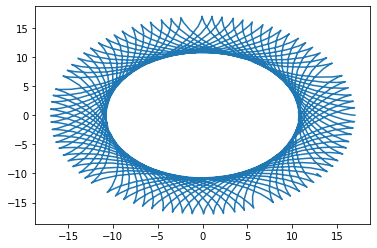

In [45]:
t=np.linspace(0,100,1000)
R=17
r=np.pi
x=(R-r)*np.cos(t)+r*np.cos((R-r)/r* t)
y=(R-r)*np.sin(t)-r*np.sin((R-r)/r* t)
fig,ax=plt.subplots()
ax.plot(x,y)

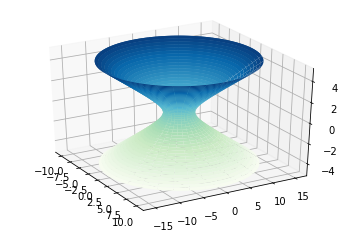

In [47]:
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
R=5
a=2
b=3
c=1
s,t=np.meshgrid(np.linspace(-R,R,1000),np.linspace(-R,R,1000))
x=a*np.sqrt(s**2+1)*np.cos(t)
y=b*np.sqrt(s**2+1)*np.sin(t)
z=c*s
ax.plot_surface(x,y,z,cmap='GnBu')
ax.view_init(elev=30., azim=-30)

#### Zadanie
Wygeneruj $100$ punktów z kraty liczba całkowitych $\{0,1,\ldots,10\}^3$. Dla każdego z nich wylosuj wartość rzeczywistą z przedziału $[0,5]$. 
<ol type="a">
  <li>Narysuj punkty w przestrzeni 3D z kolorami zależnymi od wartości w tych punktach.</li>
  <li>Policz sumę wartości wszystkich punktów o pierwszych dwóch współrzędnych (i,j) (tzn. stwórz tablicę takich wartości). Narysuj wykres powierzchni (w 3D) tych wartości</li>
</ol>



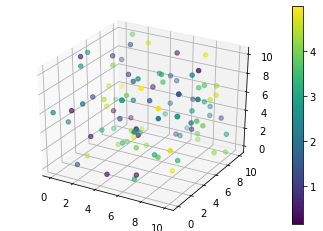

In [ ]:
#a)
x=np.random.randint(0,11,size=(100))
y=np.random.randint(0,11,size=(100))
z=np.random.randint(0,11,size=(100))
vals=5*np.random.random(size=(100))
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
im1=ax.scatter(x,y,z,c=vals)
fig.colorbar(im1)

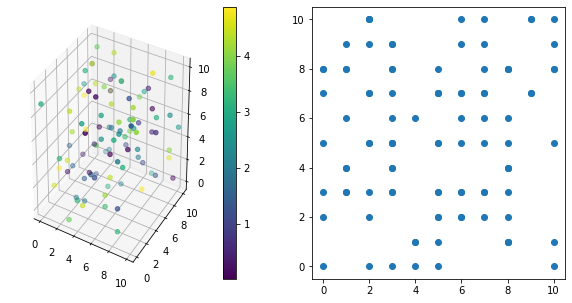

In [ ]:
#a - drugi sposób
points=np.random.randint(0,11,size=(100,3))
vals=5*np.random.random(size=(100))
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(121,projection='3d')
x,y,z=(points[:,0],points[:,1],points[:,2])
im1=ax.scatter(x,y,z,c=vals)
fig.colorbar(im1)
ax2=fig.add_subplot(122)
ax2.scatter(x,y)

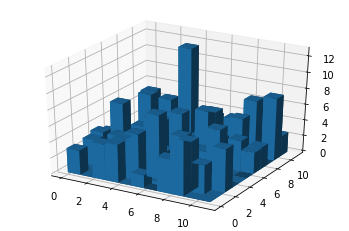

In [ ]:
#b)
L=np.zeros((11,11))
def suma(i,j):
  return np.sum(vals*(x==i)*(y==j))
for i in range(11):
  for j in range(11):
    L[i,j]=suma(i,j)
X,Y=np.meshgrid(np.arange(0,11),np.arange(0,11))

fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.bar3d(X.ravel(),Y.ravel(),np.zeros((121,)),1,1,L.ravel())



#### Zadanie domowe
Stwórz taki obrazek jak poniżej i nadaj mu tytuł oznaczając imieniem i nazwiskiem. Są na nim wykresy funkcji $y(x)=x^3+5x^2+10$ oraz jej pierwszej i drugiej pochodnej. Im dokładniej odwzorowany obrazek tym lepiej (więcej punktów)
![obrazek](https://github.com/danio2010/ON2022/blob/main/lab7-homework.png?raw=true)

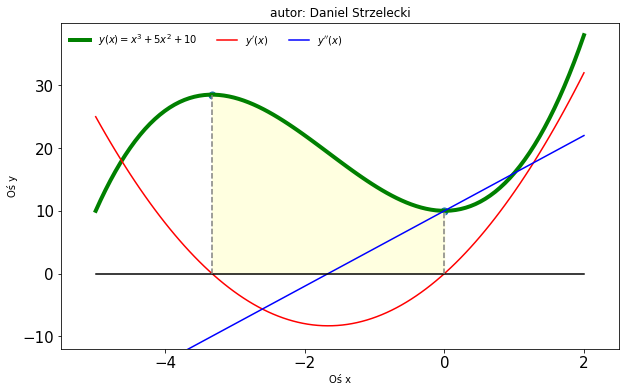

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-5,2,100)
t=sp.symbols('t')
F=t**3+5*t**2+10
y=sp.lambdify(t,F)
y1=sp.lambdify(t,F.diff(t))
y2=sp.lambdify(t,F.diff(t,2))
critical_points=np.array(sp.solve(F.diff(t)))

fig,ax=plt.subplots(figsize=(10,6))
#główne wykresy funkcji
ax.plot(x,y(x),label='$y(x)=x^3+5x^2+10$',lw=4,c='green')
ax.plot(x,y1(x),label="$y'(x)$",c='red')
ax.plot(x,y2(x),label="$y''(x)$",c='blue')

#ozdobniki
ax.plot(x,np.zeros_like(x),c='black') # oś x
ax.scatter(critical_points, y(critical_points),marker='o',s=50) #punkty krytyczne
for el in critical_points: #rzuty punktów krytycznych
  ax.plot([el,el],[0,y(el)],ls='--',c='gray')

x2=np.linspace(float(critical_points[0]),float(critical_points[1]),100)
ax.fill_between(x2,0,y(x2),color="lightyellow")

#opisy i legenda
ax.legend(ncol=3,loc='upper left',frameon=False)
ax.set(title='autor: Daniel Strzelecki',xlabel='Oś x',ylabel='Oś y')

#ustawienie limitów osi i etykiet
ax.axis([-5.5,2.5,-12,40])
ax.set_xticks([-4,-2,0,2])
ax.set_yticks([-10,0,10,20,30])
ax.tick_params(labelsize=15)



## Regresja liniowa 1D

Tabela przedstawia zależość miesięcznych wydatków na prasę w zależności od wynagrodzenia:

Pensja (tyś zł) | Wydatki na prasę (zł)
-|-
2.5|20
2.7|30
3|30
3|35
3.5|30
4|40
4.2|50
4.5|55
5| 60

Stawiamy hipotezę, że jest to zależność liniowa. Znajdź tę zależność. Jakie przewidujesz wydatki na prasę przy dochodach rzędu 10 tyś zł?


$f=ax+b$

$a=\frac{\sum(x_i-\bar{x})(y_i-\bar{y})}{\sum (x_i-\bar{x})^2}=r_{xy}\frac{s_y}{s_x}$, gdzie $r_{xy}$ to współczynnik korelacji, a $s_x$ to odchylenie standardowe.

$b=\bar{y}-a\bar{x}$.




In [49]:
x=np.array([2.5,2.7,3,3,3.5,4,4.2,4.5,5])
y=np.array([20,30,30,35,30,40,50,55,60])
np.corrcoef(x,y)

array([[1.        , 0.94931681],
       [0.94931681, 1.        ]])

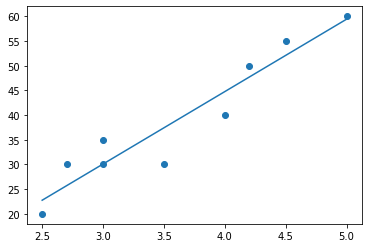

In [50]:
x=np.array([2.5,2.7,3,3,3.5,4,4.2,4.5,5])
y=np.array([20,30,30,35,30,40,50,55,60])
a=np.corrcoef(x,y)[0,1]*y.std()/x.std()
b=y.mean()-a*x.mean()

fig,ax=plt.subplots()
ax.scatter(x,y)
plt.plot(x,a*x+b)

<ErrorbarContainer object of 3 artists>

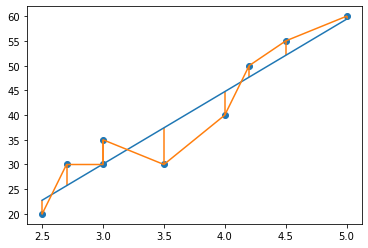

In [51]:
fig,ax=plt.subplots()
ax.scatter(x,y)
plt.plot(x,a*x+b)
plt.errorbar(x,y,np.vstack([np.zeros_like(a*x+b-y),a*x+b-y])) #vstack z tablicą zer żeby errorbar nie był rozłożony symetrycznie

In [52]:
np.sum((a*x+b-y)**2)/9

15.795417382061974

In [56]:
np.sum((a*x-b-y.mean())**2)/np.sum((y-y.mean())**2)

5.707023260173349

https://aszokalski.github.io/AI/LinearRegression.html

https://github.com/philippbauch/simple-linear-regression-notebook/blob/master/linear-regression-demo.ipynb

## Regresja nieliniowa (kwadratowa) przez metodę najmniejszych kwadratów

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


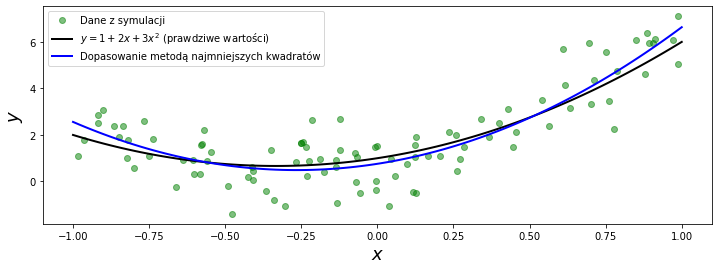

In [53]:
np.random.seed(1234)

# Rzeczywiste parametry modelu
x = np.linspace(-1, 1, 100)
a, b, c = 1, 2, 3
y_exact = a + b * x + c * x**2

# Symulacja zaszumionych danych
m = 100
X = 1 - 2 * np.random.rand(m)
Y = a + b * X + c * X**2 + np.random.randn(m)

# Dopasowanie modelu do danych z użyciem metody najmniejszych kwadratów
A = np.vstack([X**0, X**1, X**2]).T  # Zamiast vstack można również wykorzystać np.vander
sol, r, rank, sv = np.linalg.lstsq(A, Y)
y_fit = sol[0] + sol[1] * x + sol[2] * x**2
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(X, Y, 'go', alpha=0.5, label='Dane z symulacji')
ax.plot(x, y_exact, 'k', lw=2, label='$y = 1 + 2x + 3x^2$ (prawdziwe wartości)')
ax.plot(x, y_fit, 'b', lw=2, label='Dopasowanie metodą najmniejszych kwadratów')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2);

## Widgety
 Narysujemy trajektorię ruchu rzuconego kamienia w zależności od prędkości początkowej --> Spyder

## Bonus (streamplot)

Rozpatrzmy równanie różniczkowe $\left\{\begin{array}{l} x'=y(13-x^2-y^2) \\ y'=12-x(13-x^2-y^2)\end{array}\right.$
Narysujmy jego portert fazowy.

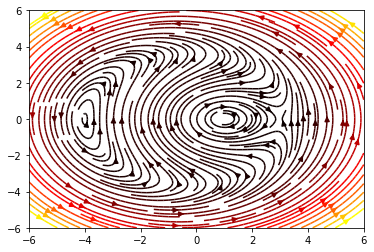

In [ ]:
X,Y=np.meshgrid(np.linspace(-6,6,100),np.linspace(-6,6,100))
WX=Y*(13-X**2-Y**2)
WY=12-X*((13-X**2-Y**2))

fig , ax=plt.subplots()
kolory=np.sqrt(WX**2+WY**2)
ax.streamplot(X,Y,WX,WY,density=2,color=kolory, cmap='hot') #start_points=[[1,2],[1,3]]